<center><h3> Painting EPIs of Church </h3></center>

In [1]:
# We will use library DataFrames to deal with DataFrames in csv
using DataFrames
using PyPlot

In [2]:
# Reading the table and images
points_x = readtable("/Users/hector/Documents/Master_thesis/EPI_code/church_EPIs_x.csv")
points_y = readtable("/Users/hector/Documents/Master_thesis/EPI_code/church_EPIs_y.csv");
# Import the first image
church_first = imread("/Users/hector/Documents/Master_thesis/EPI_samples/Church_data_set/church_image-raw/church_image_lowres/church_image-raw_0000_lowres.jpg")
church_last = imread("/Users/hector/Documents/Master_thesis/EPI_samples/Church_data_set/church_image-raw/church_image_lowres/church_image-raw_0100_lowres.jpg");

In [3]:
# Function that paints EPI
function paint_epi(points_x, points_y, ϵ, y0, s_rate=1)
    # Limits of the strip
    y01 = y0-ϵ;
    y02 = y0+ϵ;
    #Subset of features catched
    idy = (points_y[:y1].<=y02).*(points_y[:y1].>=y01);
    array_x = points_x[idy,:]
    array_y = points_y[idy,:];
    features = unique(array_x[:feature])
    for feature in unique(array_x[:feature])
        array_feature_x = array_x[array_x[:feature].==feature,:];
        array_feature_y = array_y[array_y[:feature].==feature,:];
        color_feature = array_x[array_x[:feature].==feature,:][:color][1]

        # find min and max of x coordinate for that feature
        xmax_feature_first,idxmax_feature = findmax(array_feature_x[:x1])
        xmin_feature_first, idxmin_feature = findmin(array_feature_x[:x1]);

        nonas = min(array_feature_x[idxmax_feature,:][:no_nas][1],array_feature_x[idxmin_feature,:][:no_nas][1]);
        i = 1
        max_size = size(array_feature_x[idxmax_feature,:])[2]
        cond_max = abs(array_feature_x[idxmax_feature,:][i+s_rate]-array_feature_x[idxmax_feature,:][i+s_rate+1])[1]<=10.0
        cond_min = abs(array_feature_x[idxmin_feature,:][i+s_rate]-array_feature_x[idxmin_feature,:][i+s_rate+1])[1]<=10.0
        while (i <= (nonas-s_rate-2))*(cond_max)*(cond_min)
            x_max = [array_feature_x[idxmax_feature,:][i],array_feature_x[idxmax_feature,:][i+1]]
            x_min = [array_feature_x[idxmin_feature,:][i],array_feature_x[idxmin_feature,:][i+1]]
            plot(x_max,[i,i+1],color=color_feature)
            plot(x_min,[i,i+1],color=color_feature)
            x = [x_max[2][1],x_max[1][1],x_min[1][1],x_min[2][1]]
            y = [i+1,i,i,i+1];
            fill(x,y,color=color_feature)
            x_max = [array_feature_x[idxmax_feature,:][i],array_feature_x[idxmax_feature,:][i+1]]
            x_min = [array_feature_x[idxmin_feature,:][i],array_feature_x[idxmin_feature,:][i+1]]
            cond_max = abs(array_feature_x[idxmax_feature,:][i+s_rate]-array_feature_x[idxmax_feature,:][i+s_rate+1])[1]<=10.0
            cond_min = abs(array_feature_x[idxmin_feature,:][i+s_rate]-array_feature_x[idxmin_feature,:][i+s_rate+1])[1]<=10.0
            i+=s_rate
        end
    end
    plot([0,1024,1024,0,0],[0,0,maximum(array_x[:no_nas]),maximum(array_x[:no_nas]),0],color="black")
    ax = gca()
    ax[:set_frame_on](false) 
    ax[:set_frame_on](false)
    yticks([])
    xticks([])
    maximum(array_x[:no_nas])
end

paint_epi (generic function with 2 methods)

In [4]:
# Function that paints a strip in the first image with the
# captured points
function strip_epi(points_x, points_y, ϵ, y0)
    # Limits of the strip
    y01 = y0-ϵ;
    y02 = y0+ϵ;
    #Subset of features catched
    idy = (points_y[:y1].<=y02).*(points_y[:y1].>=y01);
    array_x = points_x[idy,:]
    array_y = points_y[idy,:];   
    plot([0,1024],[y01,y01],"-r")
    plot([0,1024],[y02,y02],"-r")
    i = 1
    imshow(church_first)
    x = array_x[i][~isna(array_x[i])]
    y = array_y[i][~isna(array_y[i])]
    colors = array_x[:color][~isna(array_x[i])]
    for j in 1:size(x)[1]
        plot(x[j],y[j], color=colors[j],"o")
    end
    ax = gca()
    ax[:set_frame_on](false) 
    ax[:set_frame_on](false)
    yticks([])
    xticks([])
end

strip_epi (generic function with 1 method)

In [5]:
feature = "bush1"
y0 = maximum(points_y[points_y[:feature].==feature,:][:y1])
ϵ = 6.0;

In [11]:
size(church_first)

(683,1024,3)

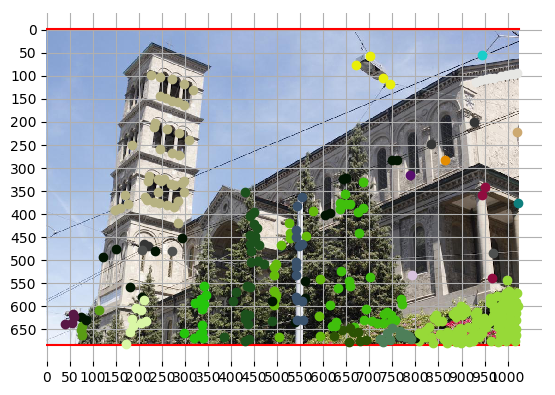

In [10]:
strip_epi(points_x, points_y,343, 342)
xticks(0:50:1024)
yticks(0:25:693)
grid("on")

First we want to select the correct thickness for different heights. We do that with different criteria depending on the height. In the next we give a first try at the bottom to be able to set up some parameters and define in more detail the pipeline.

In [7]:
# Define the height and the epsilon for the strip 
y0=673
ϵ=10;

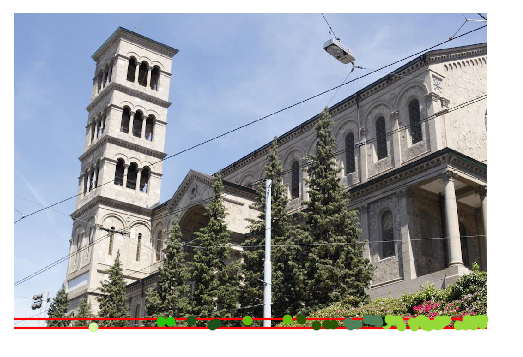

(Any[],Any[])

In [8]:
strip_epi(points_x, points_y,ϵ,y0)

In [9]:
# Limits of the strip
y01 = y0-ϵ;
y02 = y0+ϵ;
#Subset of features catched
idy = (points_y[:y1].<=y02).*(points_y[:y1].>=y01);
array_x = points_x[idy,:];
t_max = maximum(array_x[:no_nas])
no_features = size(unique(array_x[:feature]))[1]
no_features = size(unique(array_x[:feature]))[1]
tracked_points = size(array_x)[1];

In [10]:
println("In the strip "*"(y01,y02) we have "*string(tracked_points)*" different tracked points correspondent to "*string(no_features)*" different features.\n"*
    "The maximum time registered was "*string(maximum(array_x[:no_nas]))*".")

In the strip (y01,y02) we have 48 different tracked points correspondent to 8 different features.
The maximum time registered was 102.


We will use all this information to tag each picture and use that information in the postprocessing. Lets see how it the paint of the correspondent EPI behaves with respect to the sample rate.

One can observe a hockey stick around $0.16\approx 1/6$ of sampling rate where the running time start to decrease clearly. 

We can try first as in the paper of Light Field Reconstruction with Shearlets use a sample of each 4th row in the epi is known, that is the separation between sampled views will be 4 views.

In [11]:
s_rate = 4;

We can see that it is 5 time faster to sample every 4th view that to sample all the views. The format for naming  sparse EPIs will be named "y0\_$\epsilon$\_\tmax\_srate\_trackedpoints\_\#features\_sparse", the dense will be named "y0\_$\epsilon$\_\tmax\_srate\_trackedpoints\_\#features\_dense", and finally the strip with the picture as the background will be named "y0\_$\epsilon$\_\tmax\_srate\_trackedpoints\_\#features\_\#features_strip".  

We will cut the pictures to just keep the important part and then resize them programatically to a size $1024
\times t_{max}$.

In [12]:
name=string(y0)*"_"*string(ϵ)*"_"*string(t_max)*"_"string(s_rate)*"_"*string(tracked_points)*"_"*string(no_features)

"673_10_102_4_48_8"

In [13]:
path="/Users/hector/Documents/Github_Repos/MThesis/EPIs_Strips/EPIs/"

"/Users/hector/Documents/Github_Repos/MThesis/EPIs_Strips/EPIs/"

In [14]:
path*name*"_sparse"

"/Users/hector/Documents/Github_Repos/MThesis/EPIs_Strips/EPIs/673_10_102_4_48_8_sparse"

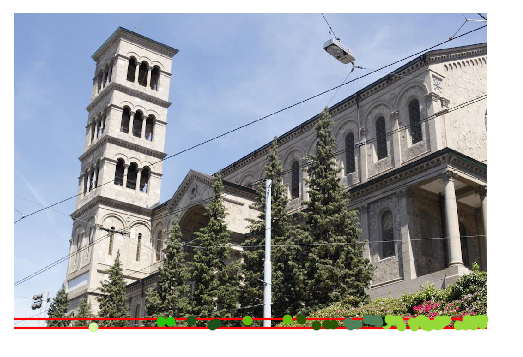

In [15]:
strip_epi(points_x, points_y,ϵ,y0)
savefig(path*name*"_strip", dpi = 80*3,bbox_inches="tight")

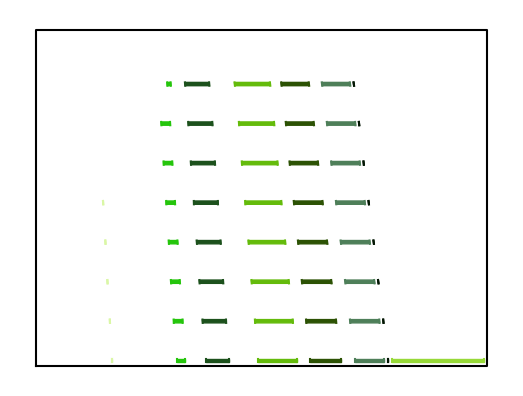

  0.480017 seconds (864.56 k allocations: 34.148 MB, 1.96% gc time)


In [28]:
@time paint_epi(points_x, points_y, ϵ, y0,12)
savefig(path*name*"_sparse", dpi = 80*3,bbox_inches="tight")

 22

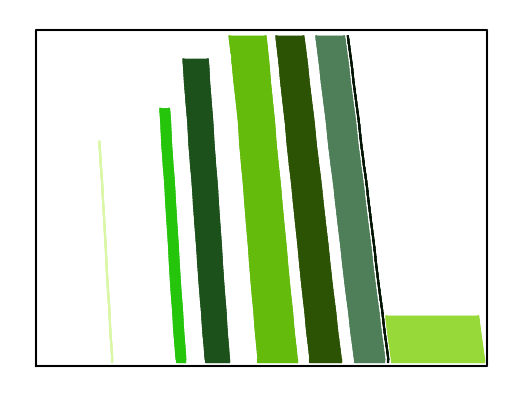

.466268 seconds (9.27 M allocations: 361.185 MB, 0.81% gc time)


In [17]:
@time paint_epi(points_x, points_y, ϵ, y0,1)
savefig(path*name*"_dense", dpi = 80*3,bbox_inches="tight")

We can see that it is 5 time faster to sample every 4th view that to sample all the views. The format for naming  sparse EPIs will be named "y0\_$\epsilon$\_\tmax\_s_rate\_\#features\_sparse", the dense will be named "y0\_$\epsilon$\_\tmax\_s_rage\_\#features\_dense", and finally the strip with the picture as the background will be named "y0\_$\epsilon$\_\tmax\_s_rate\_\#features_strip".  

We will cut the pictures to just keep the important part and then resize them programatically to a size $1024
\times t_{max}$.

In [41]:
y_benchmark_painting=[1.39,0.80,0.66,0.48]
x_benchmark_painting=[4, 7, 9, 12]

4-element Array{Int64,1}:
  4
  7
  9
 12

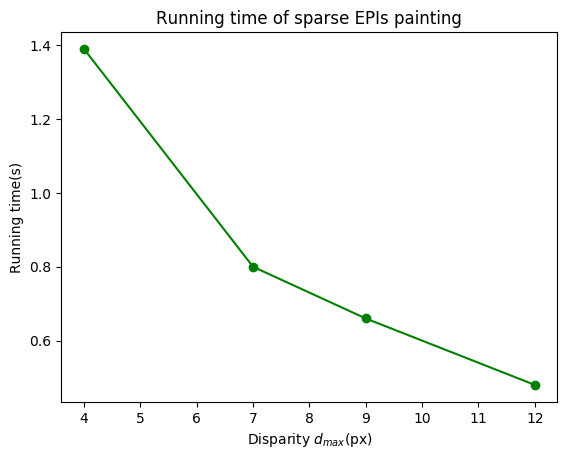

PyObject <matplotlib.text.Text object at 0x3272f2e50>

In [43]:
plot(x_benchmark_painting,y_benchmark_painting,"-go")
xlabel(L"Disparity $d_{max}$(px)")
ylabel("Running time(s)")
title("Running time of sparse EPIs painting")

### Now we can generate more of this images

In [62]:
0+ϵ

8.0

In [66]:
feature = "bush1"
y0 = maximum(points_y[points_y[:feature].==feature,:][:y1])
ϵ = 8.0;

In [67]:
s_rate = 7;

In [ ]:
for y00 in y0:-2ϵ:0+ϵ    
    # Limits of the strip
    y01 = y00-ϵ;
    y02 = y00+ϵ;
    #Subset of features catched
    idy = (points_y[:y1].<=y02).*(points_y[:y1].>=y01);
    array_x = points_x[idy,:];
    t_max = maximum(array_x[:no_nas])
    no_features = size(unique(array_x[:feature]))[1]
    no_features = size(unique(array_x[:feature]))[1]
    tracked_points = size(array_x)[1];
    name=string(Int(y00))*"_"*string(Int(ϵ))*"_"*string(t_max)*"_"string(s_rate)*"_"*string(tracked_points)*"_"*string(no_features)    
    path="/Users/hector/Documents/Github_Repos/MThesis/Diagrams/results/new_EPIs/"
    strip_epi(points_x, points_y,ϵ,y00)
    savefig(path*name*"_strip", dpi = 80*3,bbox_inches="tight")
    clf()
    paint_epi(points_x, points_y, ϵ, y00,s_rate)
    savefig(path*name*"_sparse", dpi = 80*3,bbox_inches="tight")
    clf()
    paint_epi(points_x, points_y, ϵ, y00,1)
    savefig(path*name*"_dense", dpi = 80*3,bbox_inches="tight")
    clf()
end